# Exploratory Data Analysis [ EDA ] - Udemy Course Dataset

In [268]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.style as style
style.use('ggplot')
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
font1 = {'family':'serif','color':'darkred','size':18}
font2 = {'family':'serif','color':'darkred','size':15}

### Importing dataset of Udemy_course

In [270]:
data = pd.read_csv("udemy_courses.csv")

### Look at the dataset first

In [272]:
data.head(3)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance


- The udemy courses dataset provides structured information about thousands of courses available on udemy.
- Dataset contain features like course_id, course_title, url, is_paid, price, num_subscribers, num_reviews, num_lectures, level, etc.

### Find Shape of our Dataset [ Number of Rows and Number of Columns ]

In [275]:
print('shape of the dataset ::',data.shape)
print('Number of total Rows ::',data.shape[0])
print('Number of total Columns ::',data.shape[1])

shape of the dataset :: (3678, 12)
Number of total Rows :: 3678
Number of total Columns :: 12


- Each row represents one unique course, 
- Each column describes a specific attribute of that course like title, price, level, etc

### Get Information About our Dataset 


In [278]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


- The dataset contains 3,678 Udemy courses, where each row represents one unique course and each column captures a specific course attribute.
- There are 12 columns covering pricing, popularity, content structure, difficulty level, publishing details, and subject category.
- No null values is observed
- This dataset is clean, well-structured, and analysis-ready, requiring minimal preprocessing.

### Covert datatype of published_timestamp

In [281]:
data = pd.read_csv("udemy_courses.csv",parse_dates=['published_timestamp'])
data.dtypes

course_id                            int64
course_title                        object
url                                 object
is_paid                               bool
price                                int64
num_subscribers                      int64
num_reviews                          int64
num_lectures                         int64
level                               object
content_duration                   float64
published_timestamp    datetime64[ns, UTC]
subject                             object
dtype: object

### Check for Duplicate Data and Drop Them

In [283]:
print("Number of Duplicate values ::",data.duplicated().sum())

Number of Duplicate values :: 6


In [284]:
data = data.drop_duplicates()

In [285]:
print("Number of Duplicate values ::",data.duplicated().sum())

Number of Duplicate values :: 0


### Find out Number of Courses per Subject

subject
Business Finance       1191
Graphic Design          602
Musical Instruments     680
Web Development        1199
Name: course_title, dtype: int64


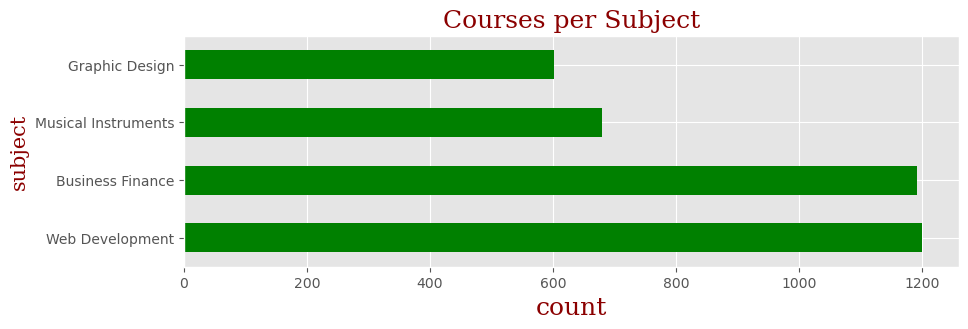

In [287]:
print(data.groupby('subject')['course_title'].count())
plt.figure(figsize=(10,3))
data['subject'].value_counts().plot(kind='barh',color='green')
plt.title("Courses per Subject",fontdict=font1)
plt.xlabel("count",fontdict=font1)
plt.ylabel("subject",fontdict=font2)
plt.show()

- Web Development (1,199 courses) and Business Finance (1,191 courses) dominate the dataset, indicating very high demand and strong competition in these domains.
- Musical Instruments (680 courses) represents a moderately sized niche, suggesting focused but steady learner interest.
- Graphic Design (602 courses) has the fewest courses, which may indicate lower competition and potential opportunity for new content creators.
- Udemy’s course offerings are heavily concentrated in technical and business-oriented subjects, while creative and skill-based domains are comparatively underrepresented. This distribution reflects learner demand trends and platform growth strategy

### For which Levels Udemy is Providing the Courses

level
All Levels            1925
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: count, dtype: int64


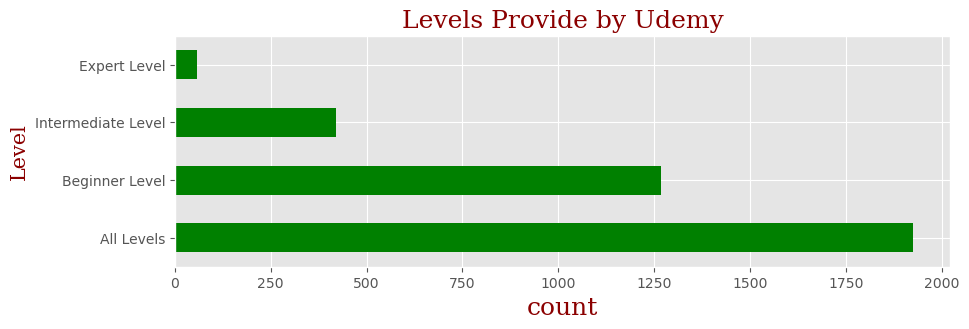

In [290]:
print(data['level'].value_counts())
plt.figure(figsize=(10,3))
data['level'].value_counts().plot(kind='barh',color='green')
plt.title("Levels Provide by Udemy",fontdict=font1)
plt.xlabel("count",fontdict=font1)
plt.ylabel("Level",fontdict=font2)
plt.show()

### Display the Count of Paid and Free Courses

is_paid
True     3362
False     310
Name: count, dtype: int64


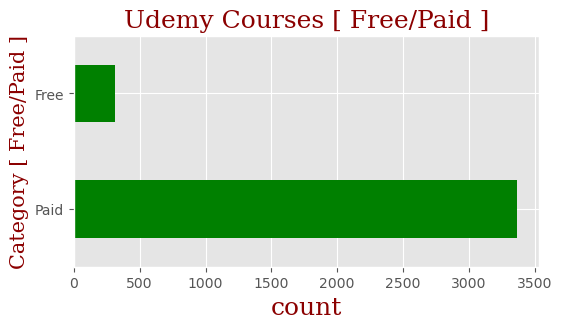

In [292]:
print(data['is_paid'].value_counts())
plt.figure(figsize=(6,3))
data['is_paid'].value_counts().rename({True: "Paid", False: "Free"}).plot(kind='barh',color='green')
plt.title("Udemy Courses [ Free/Paid ]",fontdict=font1)
plt.xlabel("count",fontdict=font1)
plt.ylabel("Category [ Free/Paid ]",fontdict=font2)
plt.show()

- The dataset is heavily dominated by paid courses, with 3,362 paid courses compared to only 310 free courses.
- This indicates that Udemy primarily operates as a paid-content platform, where most instructors monetize their courses rather than offering free content.
- The relatively small number of free courses suggests that free offerings are likely used as introductory or promotional content to attract learners before converting them to paid courses.

### Which Courses Have More Lectures [ Free or Paid ]

In [295]:
more_lec = data['num_lectures'].max()
data[data['num_lectures']==more_lec][['course_id','course_title','is_paid','num_lectures']]

,course_id,course_title,is_paid,num_lectures
2707,79154,Back to School Web Development and Programming...,True,779


- The course “Back to School Web Development and Programming” (Course ID: 79154) has the highest number of lectures (779) in the dataset.
- This course falls under the paid category, indicating that extensive and highly detailed content is typically monetized rather than offered for free.
- Courses with a large number of lectures are more likely to be paid offerings.

### Which top 10 courses have the maximum subscribers?

In [298]:
top_10_courses = (
    data[['course_title', 'num_subscribers']]
    .sort_values(by='num_subscribers', ascending=False)
    .head(10)
)
top_10_courses

,course_title,num_subscribers
2827,Learn HTML5 Programming From Scratch,268923
3032,Coding for Entrepreneurs Basic,161029
3230,The Web Developer Bootcamp,121584
2783,Build Your First Website in 1 Week with HTML5 ...,120291
3232,The Complete Web Developer Course 2.0,114512
1896,Free Beginner Electric Guitar Lessons,101154
2589,Web Design for Web Developers: Build Beautiful...,98867
2619,Learn Javascript & JQuery From Scratch,84897
3289,Practical PHP: Master the Basics and Code Dyna...,83737
3247,JavaScript: Understanding the Weird Parts,79612


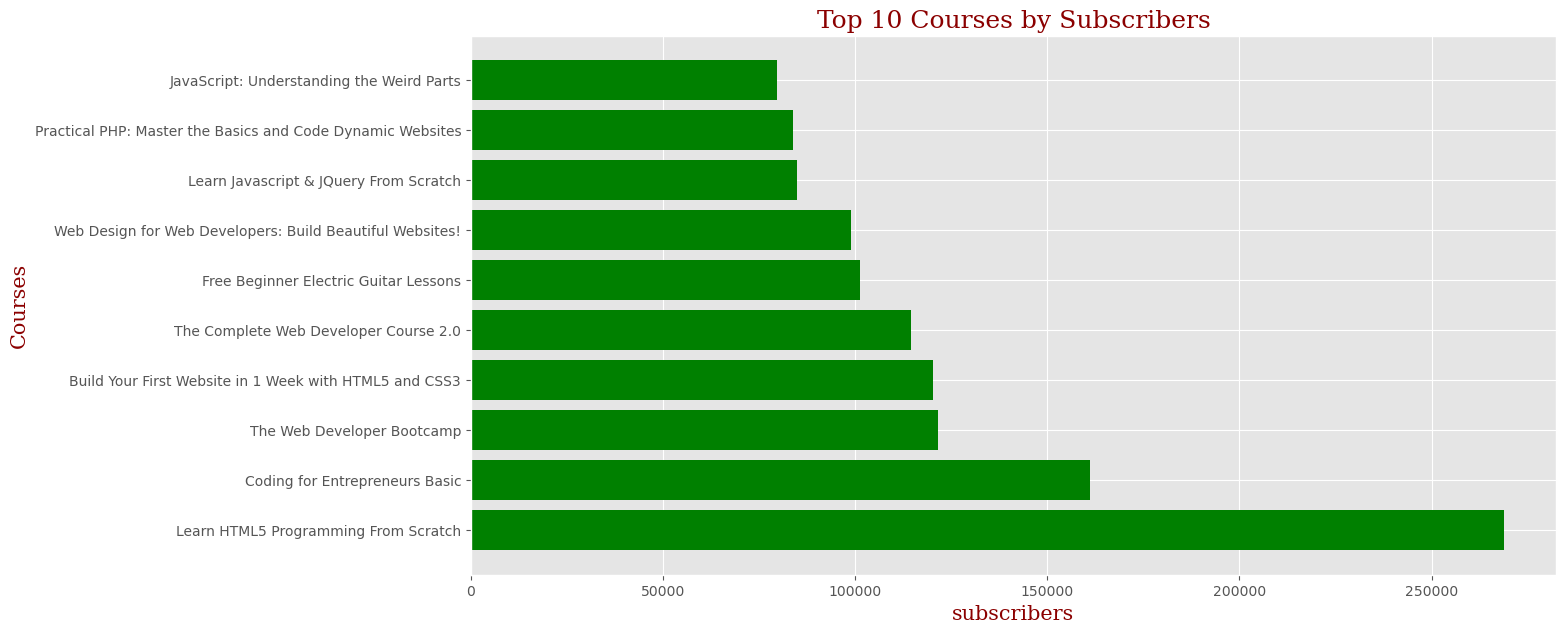

In [299]:
plt.figure(figsize=(14,7))
plt.barh(top_10_courses["course_title"], top_10_courses["num_subscribers"],color='green')
plt.title("Top 10 Courses by Subscribers",fontdict=font1)
plt.xlabel("subscribers",fontdict=font2)
plt.ylabel("Courses",fontdict=font2)
plt.show()

### What is the average price per subject?

subject
Business Finance       68.694374
Graphic Design         57.890365
Musical Instruments    49.558824
Web Development        77.035029
Name: price, dtype: float64


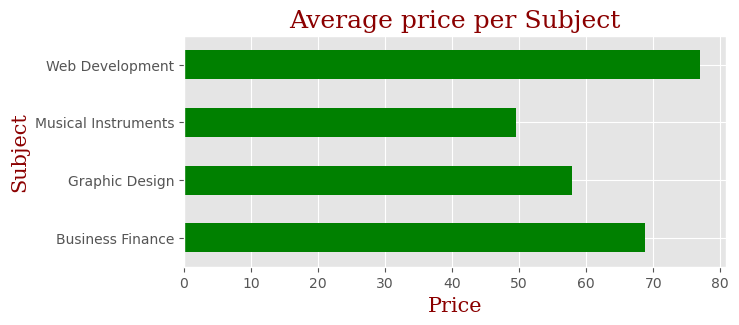

In [301]:
print(data.groupby('subject')['price'].mean())
plt.figure(figsize=(7,3))
data.groupby('subject')['price'].mean().plot(kind='barh',color='green')
plt.title("Average price per Subject",fontdict=font1)
plt.xlabel("Price",fontdict=font2)
plt.ylabel("Subject",fontdict=font2)
plt.show()

- Web Development has the highest average course price (≈ 77.04), indicating that technical skills are perceived as high-value and are priced accordingly.
- Business Finance follows closely with an average price of ≈ 68.69, reflecting strong demand for professional and career-oriented skills.
- Graphic Design courses are moderately priced (≈ 57.89), balancing creativity with market competition.
- Musical Instruments has the lowest average price (≈ 49.56), suggesting a more affordable and learner-friendly pricing strategy, possibly due to niche demand or shorter course duration.
- Subjects related to technology and business command higher prices, while creative and skill-based subjects tend to be priced lower. This reflects both market demand and perceived return on investment for learners.

### Pricing & Revenue Insights
     (a) Do paid courses attract more subscribers than free ones?
     (b) Which courses generate the highest estimated revenue?


is_paid
Free Courses    11533.951613
Paid Courses     2421.270077
Name: num_subscribers, dtype: float64


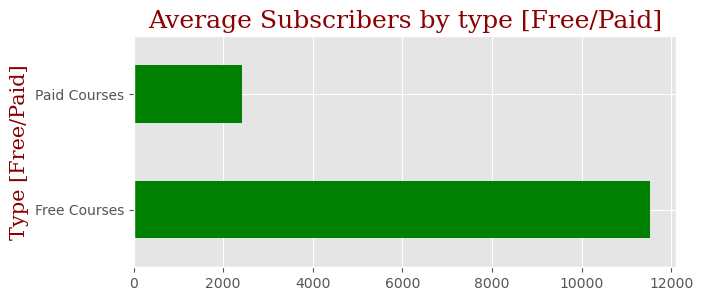

In [304]:
# (a) Do paid courses attract more subscribers than free ones?
print(data.groupby('is_paid')['num_subscribers'].mean().rename( {True: 'Paid Courses', False: 'Free Courses'}))
plt.figure(figsize=(7,3))
data.groupby('is_paid')['num_subscribers'].mean().rename( {True: 'Paid Courses', False: 'Free Courses'}).plot(kind='barh',color='green')
plt.title("Average Subscribers by type [Free/Paid]",fontdict=font1)
plt.ylabel("Type [Free/Paid]",fontdict=font2)
plt.show()

- Free courses have much more subscribers than paid courses.
- This happens because people prefer free content and there is no payment risk.
- Paid courses have fewer subscribers, but they are important because they generate revenue.

In [306]:
# (b) Which courses generate the highest estimated revenue?
data['revenue'] = data['price'] * data['num_subscribers']
top_revenue = data[['course_title', 'revenue']].sort_values(by='revenue', ascending=False).head(10)
top_revenue

,course_title,revenue
3230,The Web Developer Bootcamp,24316800
3232,The Complete Web Developer Course 2.0,22902400
1979,Pianoforall - Incredible New Way To Learn Pian...,15099800
3204,Angular 4 (formerly Angular 2) - The Complete ...,14018770
3247,JavaScript: Understanding the Weird Parts,13932100
3251,Learn and Understand NodeJS,11350560
2662,The Complete HTML & CSS Course - From Novice T...,11197290
3175,Complete PHP Course With Bootstrap3 CMS System...,10789740
3246,Learn and Understand AngularJS,10388175
3254,Modern React with Redux,9146700


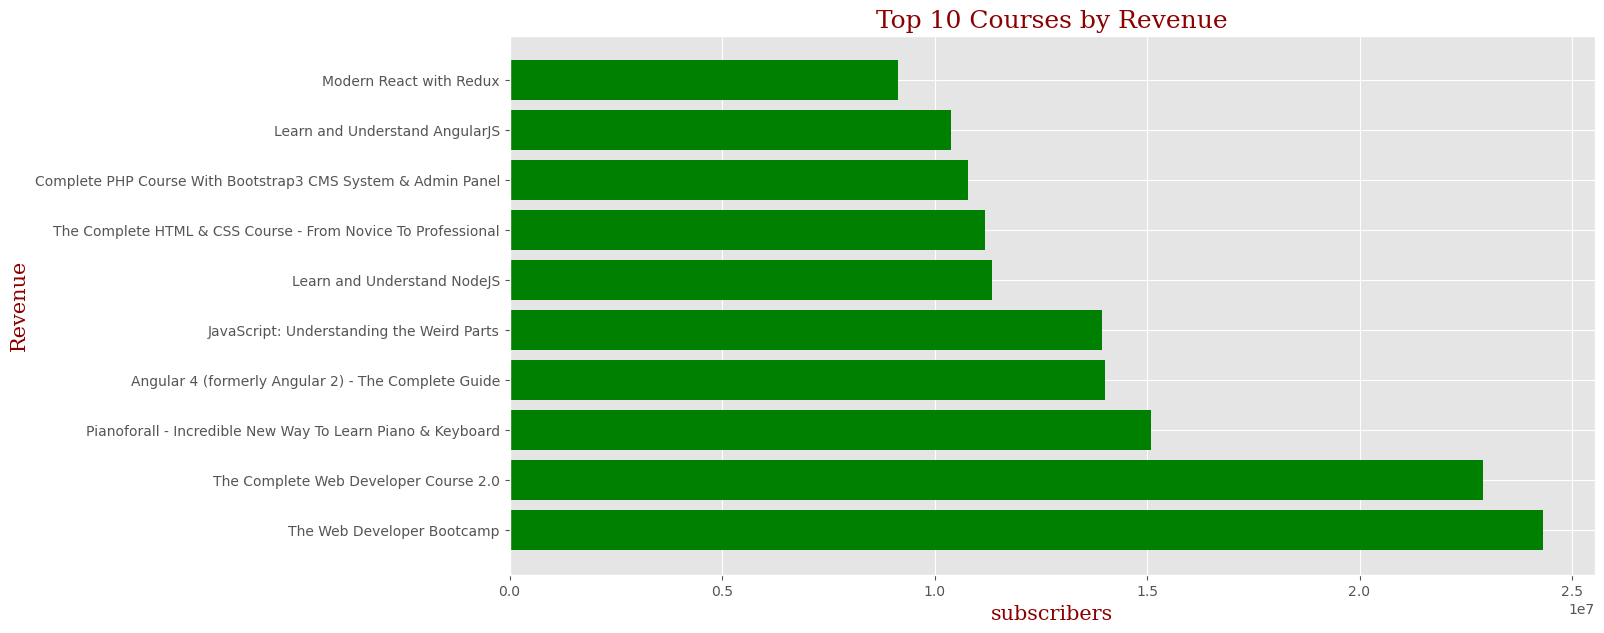

In [307]:
plt.figure(figsize=(14,7))
plt.barh(top_revenue["course_title"], top_revenue["revenue"],color='green')
plt.title("Top 10 Courses by Revenue",fontdict=font1)
plt.xlabel("subscribers",fontdict=font2)
plt.ylabel("Revenue",fontdict=font2)
plt.show()

- “The Web Developer Bootcamp” generates the highest estimated revenue, showing extremely strong demand and wide learner trust.
- The top 10 revenue-generating courses are dominated by Web Development and programming-related topics, such as JavaScript, Angular, NodeJS, React, PHP, HTML, and CSS.
- “Pianoforall – Incredible New Way To Learn Piano” is the only non-tech course in the top list, proving that high-quality with non-tech relation courses can also be very profitable.

### Content & Duration Analysis
      (a) What is the average course duration per level?
      (b) Which level (Beginner/Intermediate/All Levels) has longest courses?

level
All Levels            4.874000
Beginner Level        3.094401
Expert Level          2.905460
Intermediate Level    3.733333
Name: content_duration, dtype: float64


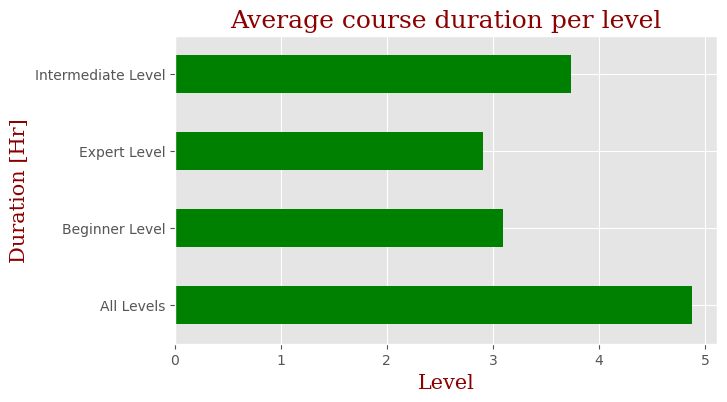

In [310]:
# (a) What is the average course duration per level?
print(data.groupby('level')['content_duration'].mean())
plt.figure(figsize=(7,4))
data.groupby('level')['content_duration'].mean().plot(kind='barh',color='green')
plt.title("Average course duration per level",fontdict=font1)
plt.ylabel("Duration [Hr]",fontdict=font2)
plt.xlabel("Level",fontdict=font2)
plt.show()

- All Levels courses have the longest average duration (≈ 4.87 hours), suggesting they are designed to cover topics from basics to advanced, making them more comprehensive.
- Beginner Level courses are shorter (≈ 3.09 hours), which fits their purpose of providing quick introductions without overwhelming new learners.
- Intermediate Level courses (≈ 3.73 hours) are longer than beginner courses, indicating more detailed and practical content.
- Expert Level courses have the shortest duration (≈ 2.91 hours), implying they are focused and topic-specific, assuming prior knowledge.

level
All Levels            76.5
Beginner Level        78.5
Expert Level          12.5
Intermediate Level    31.5
Name: content_duration, dtype: float64


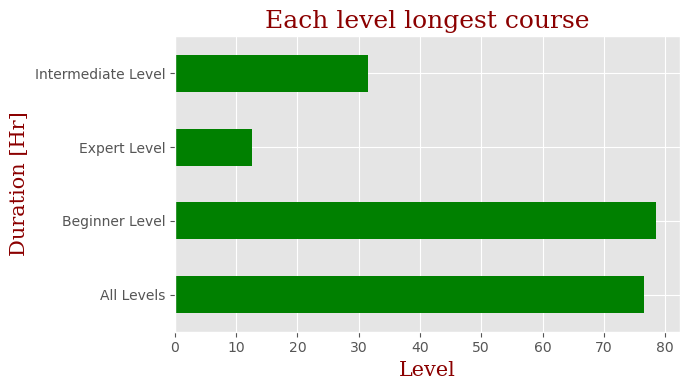

In [312]:
# (b) Which level (Beginner/Intermediate/All Levels) has longest courses?
print(data.groupby('level')['content_duration'].max())
plt.figure(figsize=(7,4))
data.groupby('level')['content_duration'].max().plot(kind='barh',color='green')
plt.title("Each level longest course",fontdict=font1)
plt.ylabel("Duration [Hr]",fontdict=font2)
plt.xlabel("Level",fontdict=font2)
plt.tight_layout()
plt.show()

- Amoung Beginner/Intermediate/All Levels, Beginner Level privide the longest course with 78.5 hr. of duration
- While All Levels is not far behind with 76.5 hr. of duration 